In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [54]:
train = pd.read_csv('./titanic_dataset/train.csv')
test = pd.read_csv('./titanic_dataset/test.csv')

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Exploración de datos

In [58]:
# exploracion de las columnas categoricas
# ver si existe desbalanceo entre los datos

<AxesSubplot:xlabel='Survived', ylabel='count'>

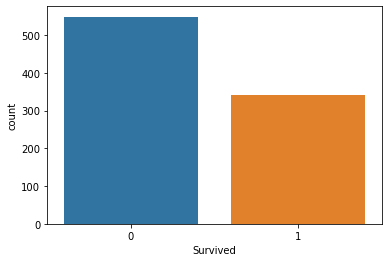

In [64]:
sns.countplot(train['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

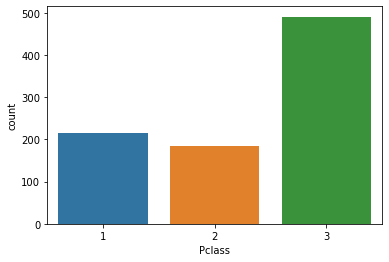

In [65]:
sns.countplot(train['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

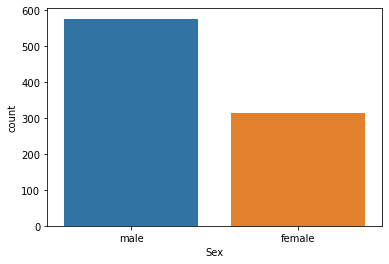

In [66]:
sns.countplot(train['Sex'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

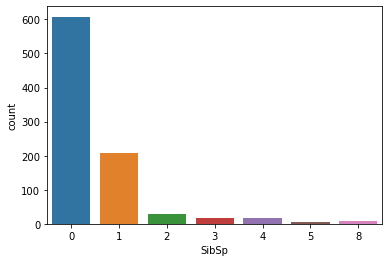

In [67]:
sns.countplot(train['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

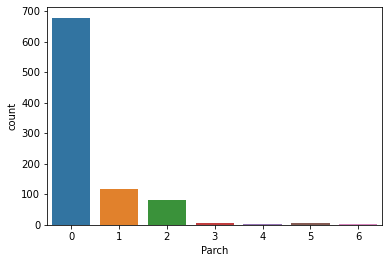

In [68]:
sns.countplot(train['Parch'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

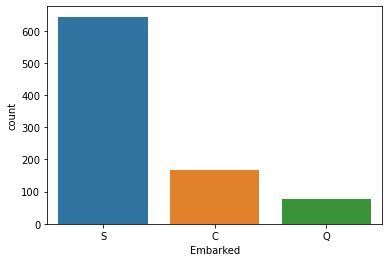

In [69]:
sns.countplot(train['Embarked'])

In [70]:
# exploracion de las columnas numericas
# ver si hay una distribucion normal o sigue alguna distribucion

<AxesSubplot:xlabel='Age', ylabel='Density'>

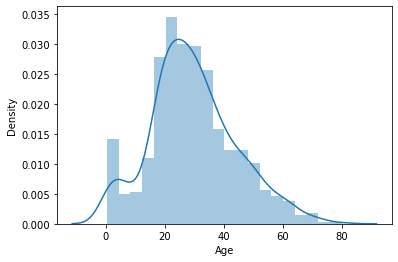

In [71]:
sns.distplot(train['Age'])

# sigue una distribucion uniforme

<AxesSubplot:xlabel='Fare', ylabel='Density'>

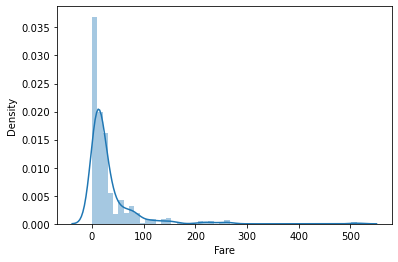

In [72]:
sns.distplot(train['Fare'])

# en este caso hay que realizar un preprocesado
# puesto que existen datos que estan fuera de la distrib central

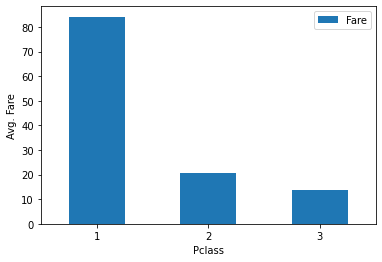

In [74]:
# crear pivot table, en el parametro de values calculado la media
# representa el coste de cada ticket 1, 2, 3 clases
class_fare = train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

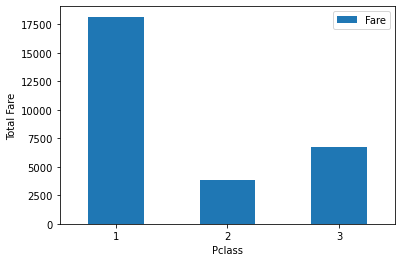

In [85]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

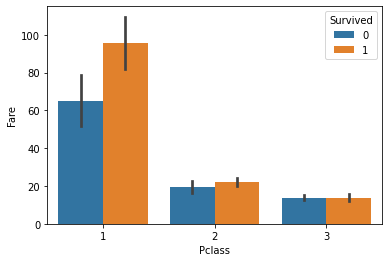

In [86]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

# comparativa entre los pasajeros que sobrevivieron
# la tarifa del ticket y la clase del pasajero

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

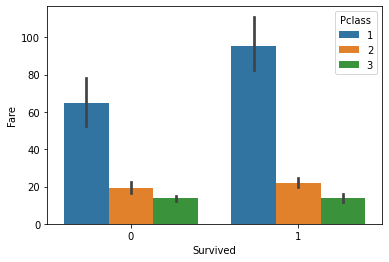

In [87]:
# misma grafica anterior
# se observa que la mayoria de supervivientes son de clase 1
# aunque la clase 1 representa la mayoria de pasajeros
# por lo tanto tambien sus muertes son mas elevadas

sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')

## Preprocesado de datos

In [88]:
train_len = len(train)

# combinar test y train
# de forma verticalmente, apilando las filas de train y despues las filas de test
df = pd.concat([train, test], axis=0)

# resetear los indices del dataframe.
# sino los indices son una combinacion de train y test
# es decir i0_train - imax_train - i0_test - imax_test
df = df.reset_index(drop=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### Tratamiento de nulos

In [90]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [91]:
# drop de la columna 'Cabin'

In [92]:
df = df.drop('Cabin', axis=1)

In [93]:
# rellenar los valores missing de 'Age', 'Fare' con sus medias

In [94]:
df['Age'] = df['Age'].fillna(df.Age.mean())

In [95]:
df['Fare'] = df.Fare.fillna(df.Fare.mean())

In [96]:
# rellenar el puerto de embarque con la moda
# puesto que solo hay tres puertos de embarque

In [97]:
df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

### Normalizar la la distribucion de la columna Fare

In [98]:
# la transformacion logarimitca es utilizada comunmente
# en las distribuciones sesgadas o asimetricas
# esta transformacion hace que la distrib sea mas simetrica
# se suma 1 para los casos de que Fare sea null

df['Fare'] = np.log(df['Fare']+1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

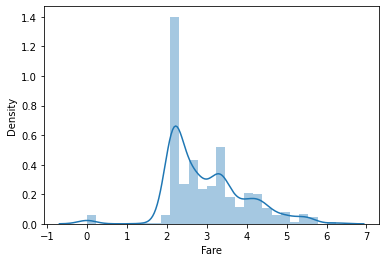

In [99]:
sns.distplot(df.Fare)

## Matriz de correlacion

<AxesSubplot:>

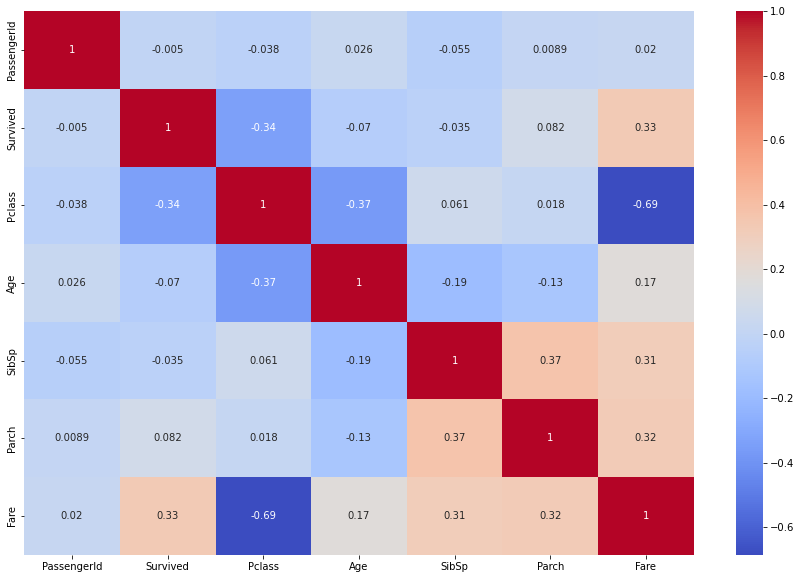

In [104]:
corrmat = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [107]:
# drop de columnas no interes en el estudio

df = df.drop(['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


## Label encondig

In [110]:
# convertir la columna Sex en 0 y 1. Embarked 0 1 2 (C, Q, S)

from sklearn.preprocessing import LabelEncoder

cols = ['Sex','Embarked']
le = LabelEncoder()

for c in cols:
    df[c] = le.fit_transform(df[c])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


## Train-Test split

In [122]:
# para la division de train. Coger todos las filas hasta train_len
train = df.iloc[:train_len, :]

test = df.iloc[train_len:, :]

In [125]:
len(train), len(test)

(891, 418)

In [126]:
# input split

X = train.drop(['PassengerId','Survived'], axis=1)
y = train['Survived']

## Model training

In [131]:
from sklearn.model_selection import train_test_split, cross_val_score

# classify column
def classify(model):
    
    # separacion de datos 
    x_train, x_test, y_train, y_test =  \
    train_test_split(X, y, test_size=0.25, random_state=21)
    
    
    model.fit(x_train, y_train)
    
    print('Accuracy:', model.score(x_test, y_test))
    
    # validacion cruzada
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [132]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.7982062780269058
CV Score: 0.7833971502102819


In [134]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.8071748878923767
CV Score: 0.8125980792166217


In [139]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.8475336322869955
CV Score: 0.8125980792166217
